## Paquetes utilizados

In [1]:
import pandas as pd
import numpy as np
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Carga de datos y análisis de datos

### Precipitaciones

Se importa el archivo de precipitaciones y se chequea la cantidad de filas duplicadas

In [3]:
precipitaciones = pd.read_csv('precipitaciones.csv')
filas_duplicadas = precipitaciones.duplicated(subset=['date']).sum()
print('Cantidad de filas duplicadas {}'.format(filas_duplicadas))


Cantidad de filas duplicadas 0


Se presenta la cantidad de datos nulos:

In [4]:
precipitaciones.isnull().sum()

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

In [5]:
display(precipitaciones.head())
display(precipitaciones.tail())

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
491,1988-10-01,0.0,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.0,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.0,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.0,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419
495,1982-04-01,0.0,0.019610,6.848607,16.891752,28.904933,41.035299,47.870769,89.875426


Se ordenan por fecha y se limpia el nombre de las columnas

In [6]:
precipitaciones['date'] = pd.to_datetime(precipitaciones['date'])
precipitaciones.sort_values(['date'], inplace = True)
precipitaciones.reset_index(inplace=True, drop = True)

lluvia_cols_ini = precipitaciones.columns[1:]
lluvia_cols_fin = [ ' '.join(x.replace('_',' ').split()) for x in lluvia_cols_ini]
new_cols = dict(zip(lluvia_cols_ini,lluvia_cols_fin))
precipitaciones.rename(columns=new_cols, inplace = True)

Se grafican los datos para observar la distribución de las columnas

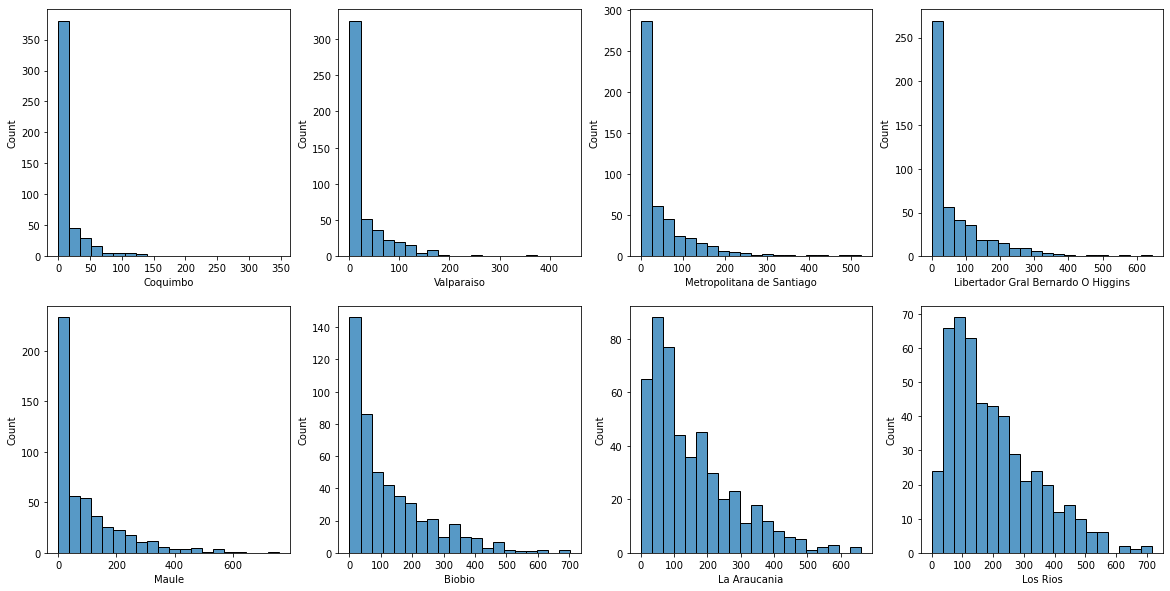

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
idx_feature = 0

for i in range(ax.shape[0]):
    for j in range(0, ax.shape[1]):
        col_precipitaciones = lluvia_cols_fin[idx_feature]
        plot = sns.histplot(data=precipitaciones,
                            x = col_precipitaciones,
                            kde=False,
                            bins=20,
                            ax=ax[i][j])
        plot.set_xlabel(col_precipitaciones)
        idx_feature += 1 

Se puede observar que los datos de precipitaciones siguen una distribución exponencial, aquellas regiones localizadas más al sur de Chile observan mayores niveles de precipitaciones, en cambio aquellas regiones centro-norte tienen mayores meses con pocas precipitaciones.

### Banco central

In [8]:
banco_central = pd.read_csv('banco_central.csv')
print("Primeras 5 filas de la tabla banco central")
display(banco_central.head())

Primeras 5 filas de la tabla banco central


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


Se observa que los datos contienen puntos que provocan la pérdida de la información relativa a la ubicación del separador de decimales. Esto tiene como consecuencia que los datos ingresados no puedan ser detectados como númericos, sino como cadenas de texto.

In [9]:
banco_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

Antes que todo, se modifica el nombre de la columna de fecha, y se ordena ascendentemente. Además se limpia esta columna para que pueda ser utilizada como _timestamp_

In [10]:
banco_central.rename(columns={'Periodo':'date'}, inplace = True)
banco_central.sort_values(['date'], inplace = True)
banco_central.reset_index(inplace=True, drop = True)
banco_central['date'] = banco_central['date'].astype(str).str.replace(' UTC','')
banco_central['date'] = pd.to_datetime(banco_central['date'], errors = 'coerce', format="%Y-%m-%d %H:%M:%S")
banco_central.dropna(subset=['date'],inplace=True)

In [11]:
display(banco_central.head())
display(banco_central.tail())

,date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
608,2020-07-01,966.693.225,933.369.433,104.988.256,969.434.205,813.420.488,931.746.336,996.428.565,966.321.757,955.926.074,...,100.164.187,977.952.851,989.525.701,10.629.584,946.859.919,6477.7,901.338.756,878.226.907,998.894.175,11454.0
609,2020-08-01,101.314.552,926.876.935,103.697.799,980.026.279,798.286.232,108.232.893,104.806.496,100.569.037,10.092.332,...,10.151.671,990.282.658,10.054.901,105.462.309,960.377.084,6452,119.872.405,107.356.493,172.702.233,19037.0
610,2020-09-01,103.201.091,922.072.659,100.589.658,100.132.069,793.042.271,111.622.999,108.317.886,102.561.718,103.388.943,...,100.765.123,981.354.575,986.035.178,99.974.429,972.476.933,6163.1,118.690.966,107.622.401,165.411.522,31897.0
611,2020-10-01,108.402.879,103.551.978,103.153.982,108.477.999,998.283.785,116.649.655,109.798.567,108.112.878,108.891.792,...,102.554.585,104.873.347,102.057.742,10.233.489,10.824.254,6436.9,122.239.313,114.265.499,155.896.885,36243.0
612,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29486.0


Se observa que existe una cantidad considerable de valores nulos. Especificamente se tienen:

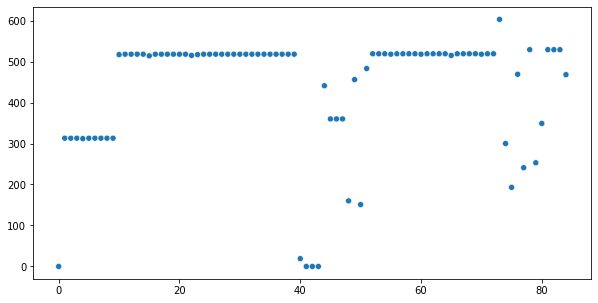

In [12]:
nulos_bc = pd.DataFrame(banco_central.isnull().sum())
nulos_bc.reset_index(inplace = True)
nulos_bc.rename(columns={'index':'categoria'})
fig, ax = plt.subplots(figsize=(10, 5))
l = sns.scatterplot(data=nulos_bc, legend = False)


Se puede observar la gran cantidad de entradas nulas que contiene este dataset, las cuales se enfrentarán en pasos posteriores. 

Considerando que los datos están como cadena de texto, dado los puntos que existen en las series, en primera instancia se eliminan los puntos, se transforman los datos a _floats_ y se grafica para observar la distribución y decidir si es necesario hacer una mayor limpieza. 

In [13]:
columnas_bc = banco_central.columns[1:]
for col in columnas_bc:
    banco_central[col] = banco_central[col].astype(str).str.replace('.','')
    banco_central[col] = pd.to_numeric(banco_central[col], errors='coerce')
    banco_central[col] = banco_central[col].astype(float)

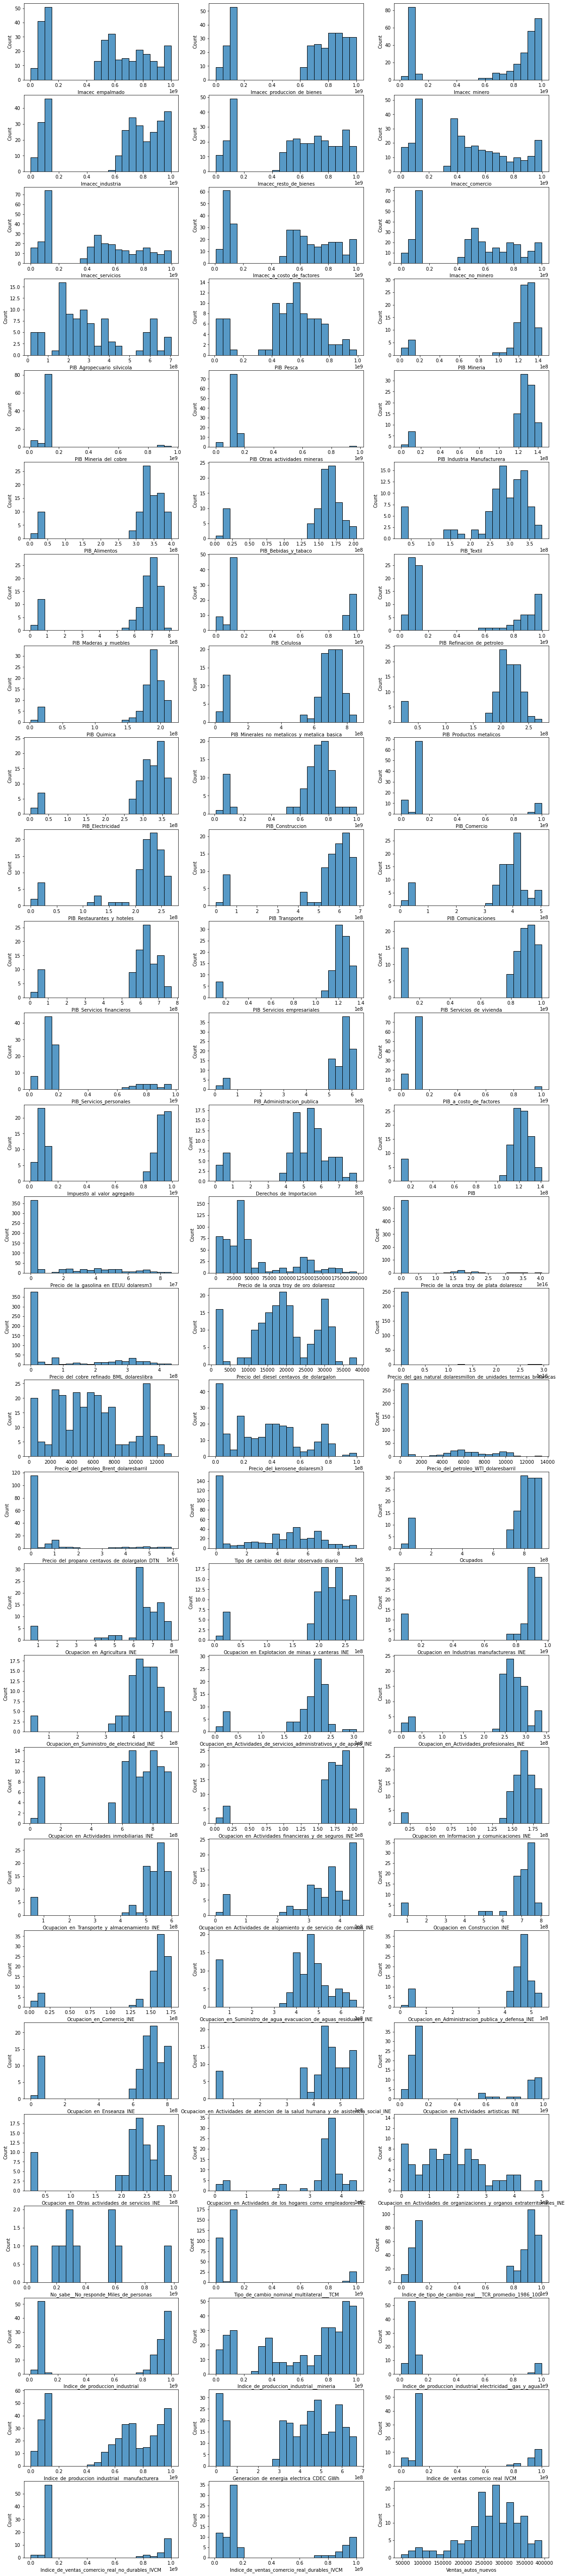

In [14]:
fig, ax = plt.subplots(nrows=28, ncols=3, figsize=(20, 100))
idx_feature = 0

for i in range(ax.shape[0]):
    for j in range(0, ax.shape[1]):
        col_bc = columnas_bc[idx_feature]
        plot = sns.histplot(data=banco_central,
                            x = col_bc,
                     kde=False,
                     bins=20,
                     ax=ax[i][j])
        plot.set_xlabel(col_bc)
        idx_feature += 1 

Se observa que los valores son de un orden muy alto, dado que se perdió la ubicación del separador decimal. Además, se aprecia que para una cantidad considerable de columnas existe una diferencia muy marcada entre los valores cercanos a 0 y otros mucho más altos. Esto es debido a que al perder la referencia del decimal, los valores más cercanos a 1 son aquellos que el orden de magnitud aumentó con respecto a los más cercanos a 9. Es por esto que estos valores tienen un orden de magnitud más alto que aquellos presentes hacia la derecha de los histogramas. 

Para resolver esto, se crean funciones que permitan ubicar los separador de miles y también para lidiar con outliers presentes.

In [15]:
def add_puntodecimal(x,separador,cut1,cut2):
    if x[0] == str(separador):
        x = x[:cut1] + '.' + x[cut1:]
    else:
        x = x[:cut2] + '.' + x[cut2:]
    return x


def remove_outliers(serie):
    avg, std = np.mean(serie), np.std(serie)
    corte = std * 3
    lower = avg - corte
    upper = avg + corte
    serie = serie.apply(lambda x : _remove_outliers(x, lower, upper))
    return serie
    
def _remove_outliers(x, lower, upper):
    if np.isnan(x):
        return x
    elif x < lower or x > upper:
        return float('NaN')
    else:
        return x

En primera instancia, a todas las series se eliminarán los datos que tengan más de un punto. Y luego se agregará un separador de decimales entre el segundo y tercer dígito.

In [16]:
for col in columnas_bc:
    banco_central[col] = banco_central[col].astype(str).str.replace('.','')
    banco_central[col] = banco_central[col].apply(lambda x : add_puntodecimal(x,1,2,1))
    banco_central[col] = pd.to_numeric(banco_central[col], errors='coerce')
    banco_central[col] = banco_central[col].astype(float)

Ahora se grafica nuevamente para ver como quedaron los histogramas.

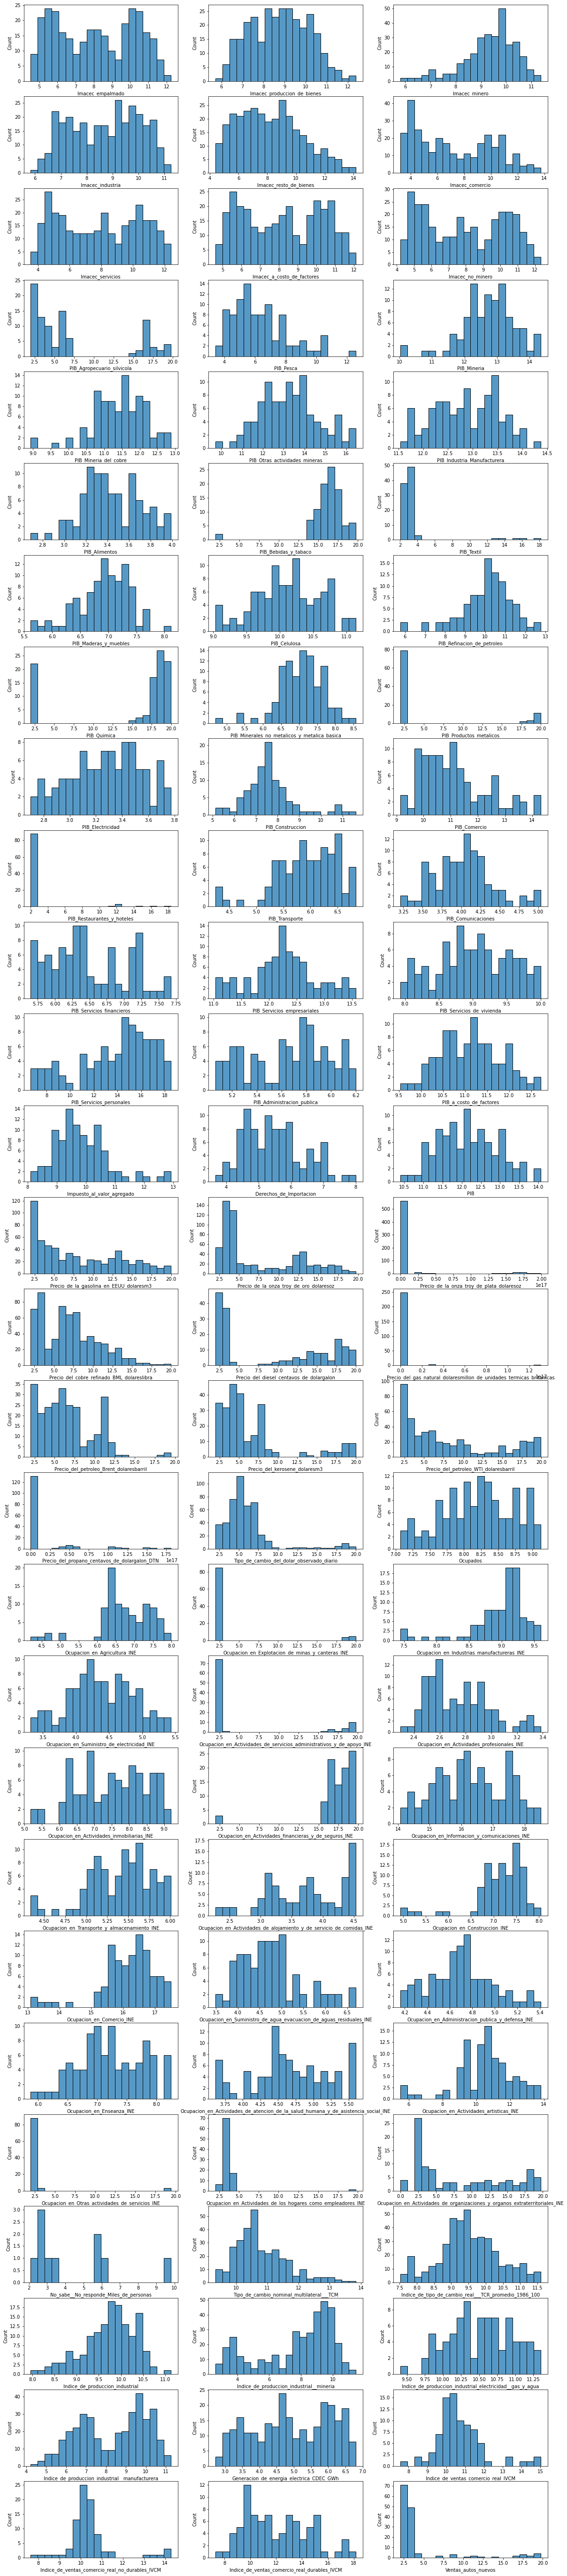

In [17]:
fig, ax = plt.subplots(nrows=28, ncols=3, figsize=(20, 100))
idx_feature = 0

for i in range(ax.shape[0]):
    for j in range(0, ax.shape[1]):
        col_bc = columnas_bc[idx_feature]
        plot = sns.histplot(data=banco_central,
                            x = col_bc,
                     kde=False,
                     bins=20,
                     ax=ax[i][j])
        plot.set_xlabel(col_bc)
        idx_feature += 1 

Ahora se puede apreciar que existen series con cambio de magnitud en el 2do digito, y también otras series con outliers.

In [18]:
outliers = ['PIB_Textil','PIB_Bebidas_y_tabaco', 'PIB_Textil', 'PIB_Quimica', 'PIB_Productos_metalicos',
            'PIB_Restaurantes_y_hoteles','Precio_de_la_onza_troy_de_plata_dolaresoz',
            'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
            'Precio_del_propano_centavos_de_dolargalon_DTN']

separador_2 = ['PIB_Productos_metalicos','PIB_Quimica','Ocupacion_en_Explotacion_de_minas_y_canteras_INE', 'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE',
              'Ocupacion_en_Actividades_financieras_y_de_seguros_INE',
              'Ocupacion_en_Otras_actividades_de_servicios_INE',
              'Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE',
              ]

In [19]:
for col in separador_2:
    banco_central[col] = banco_central[col].astype(str).str.replace('.','')
    banco_central[col] = banco_central[col].apply(lambda x : add_puntodecimal(x,3,1,2))
    banco_central[col] = pd.to_numeric(banco_central[col], errors='coerce')
    banco_central[col] = banco_central[col].astype(float)

In [20]:
for col in outliers:
    banco_central[col] = remove_outliers(banco_central[col])

Graficamos una vez más para quedar satisfechos con los datos.

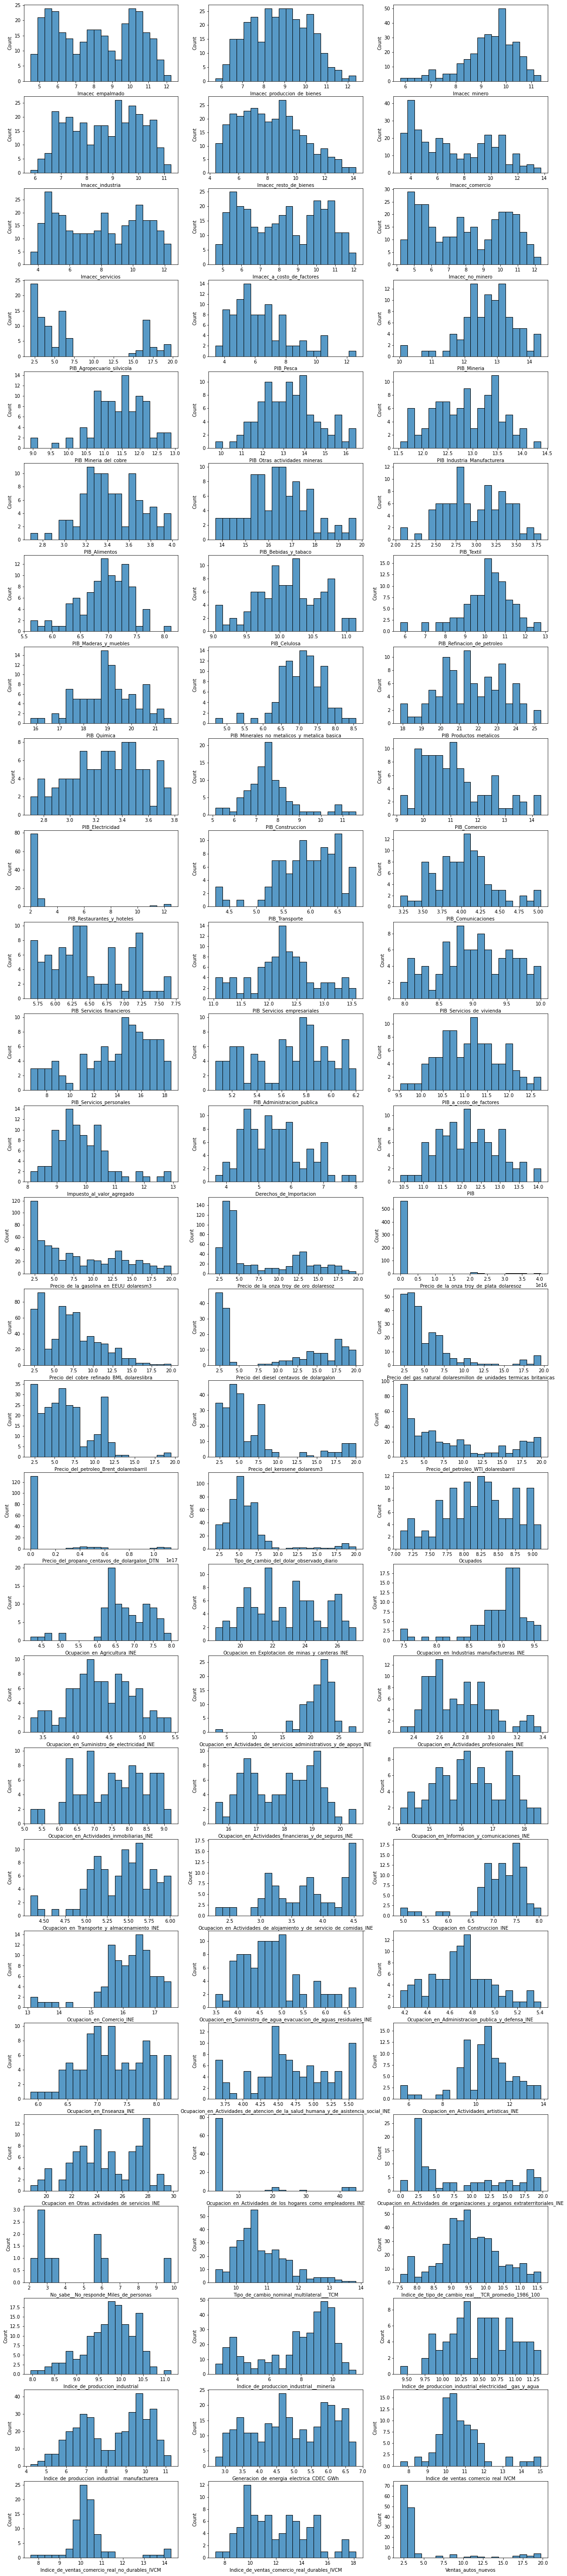

In [21]:
fig, ax = plt.subplots(nrows=28, ncols=3, figsize=(20, 100))
idx_feature = 0

for i in range(ax.shape[0]):
    for j in range(0, ax.shape[1]):
        col_bc = columnas_bc[idx_feature]
        plot = sns.histplot(data=banco_central,
                            x = col_bc,
                     kde=False,
                     bins=20,
                     ax=ax[i][j])
        plot.set_xlabel(col_bc)
        idx_feature += 1 

Finalmente, se observa un par de series con situaciones particulares, las cuales son resueltas variando la ubicación del punto decimal:

Text(0.5, 0, 'PIB_Agropecuario_silvicola')

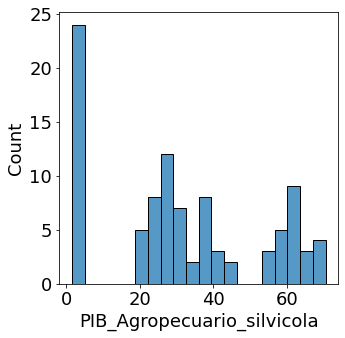

In [50]:
separador_8 = ['PIB_Agropecuario_silvicola']
for col in separador_8:
    banco_central[col] = banco_central[col].astype(str).str.replace('.','')
    banco_central[col] = banco_central[col].apply(lambda x : add_puntodecimal(x,1,1,2))
    banco_central[col] = pd.to_numeric(banco_central[col], errors='coerce')
    banco_central[col] = banco_central[col].astype(float)
    
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.histplot(data=banco_central,
                            x = 'PIB_Agropecuario_silvicola',
                     kde=False,
                     bins=20,
                     )
plot.set_xlabel('PIB_Agropecuario_silvicola')

Text(0.5, 0, 'PIB_Servicios_financieros')

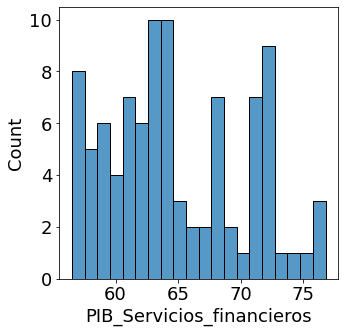

In [51]:
separador_3 = ['PIB_Servicios_financieros']
for col in separador_3:
    banco_central[col] = banco_central[col].astype(str).str.replace('.','')
    banco_central[col] = banco_central[col].apply(lambda x : add_puntodecimal(x,1,2,2))
    banco_central[col] = pd.to_numeric(banco_central[col], errors='coerce')
    banco_central[col] = banco_central[col].astype(float)
    
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.histplot(data=banco_central,
                            x = 'PIB_Servicios_financieros',
                     kde=False,
                     bins=20,
                     )
plot.set_xlabel('PIB_Servicios_financieros')

Tenemos 84 features, vamos a dejar las filas que tengan un 75% o más de columnas nulas

In [24]:
banco_central = banco_central.dropna(thresh=20).sort_values('date')

### Visualización

Se crean las funciones necesarias para toda esta sección

In [25]:
def plot_region(region, start_date, end_date, df):
    columnas = df.columns[1:]
    try:
        start_date = datetime.strptime(start_date, '%Y-%m-%d')    
    except ValueError:
        print('Por favor ingresar fecha inicial en formato YYYY-MM-DD')
        raise
    try:
        end_date = datetime.strptime(end_date, '%Y-%m-%d')
    except ValueError:
        print('Por favor ingresar fecha final en formato YYYY-MM-DD')
        raise
        
    if end_date < start_date:
        print('Fecha inicial posterior a fecha final')
        raise ValueError
        
        
    if region in columnas:
        df_tmp = df[['date',region]]
        df_tmp = df_tmp.dropna()
        since = datetime.strftime(min(df_tmp['date']), '%Y-%m-%d')
        until = datetime.strftime(max(df_tmp['date']), '%Y-%m-%d')
        df_tmp = df_tmp[df['date'].between(start_date, end_date, inclusive = True)]
        if df_tmp.shape[0] == 0:
            print('No existen datos para las fecha indicadas')
            print('Para la región {} existen datos desde {} hasta {}'.format(region, since, until))
        df_tmp.reset_index(inplace=True, drop=True)
        _plot_region(df_tmp, region)
        
        
    else:
        print('Región no presente en los datos')
        print('Regiones disponibles:')
        for region in columnas:
            print('- {}'.format(region))
        

In [26]:
def _plot_region(df,region):
    plt.rcParams["figure.figsize"] = (15,7)
    plt.rcParams.update({'font.size': 18})
    plt.rcParams['lines.linewidth'] = 2.5
    
    fig, ax = plt.subplots()
    sns.lineplot(data = df, x = 'date', y = region, color = 'r')
    
    ax.set_ylabel('milímetros de lluvia', fontsize = 20)
    ax.set_title('Lluvia mensual en {}'.format(region))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_xlim(df['date'].iloc[0], df['date'].iloc[-1])
    
    big_tick = mdates.MonthLocator(interval=12)
    
    small_tick = mdates.MonthLocator(interval=3)
    ax.xaxis.set_minor_locator(small_tick)
    
    
    ax.grid(True)
    
    
    fig.autofmt_xdate(rotation = 45)
    plt.tight_layout()
    plt.show()

In [27]:
mes_en = ['January','February','March','April','May','June','July','August','September','October','November','December']
mes_es = ['enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre']

dict_mes = dict(zip(mes_en,mes_es))

In [28]:
def plot_multiyears(df, years, region):
    regiones_df = df.columns[1:]
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    df['month'] = df['date'].apply( lambda x : datetime.strftime(x, '%B'))
    df['month'] = df['month'].apply( lambda x : dict_mes[x])

    check_years = all(year in df['year'].unique() for year in años)
    
    if not check_years:
        print('Uno o más años ingresados no están disponibles')
    else:
        if region in regiones_df:
            df = df[['date','year','month',region]]
            df = df.loc[df['year'].isin(years)]
            _plot_multiyears(df, años, region)
            #return df

        else:
            print('Región no presente en los datos')
            print('Regiones disponibles:')
            for region in columnas:
                print('- {}'.format(region))

In [29]:
def _plot_multiyears(df, years, region):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.lineplot(data = df, x = 'month', y = region, hue = 'year', palette='tab20c')
    ax.set_ylabel('milímetros de lluvia', fontsize = 20)
    
    ax.set_title('Lluvia en {} por año'.format(region))
    fig.autofmt_xdate(rotation = 45)
    ax.set_xlabel('')
    plt.tight_layout()
    ax.grid(True)

In [30]:
def multi_series_daterange(df, series, start_date, end_date, y_label):
    columnas = df.columns[1:]
    try:
        start_date = datetime.strptime(start_date, '%Y-%m-%d')    
    except ValueError:
        print('Por favor ingresar fecha inicial en formato YYYY-MM-DD')
        raise
    try:
        end_date = datetime.strptime(end_date, '%Y-%m-%d')
    except ValueError:
        print('Por favor ingresar fecha final en formato YYYY-MM-DD')
        raise
        
    if end_date < start_date:
        print('Fecha inicial posterior a fecha final')
        raise ValueError
        
    for serie in series:
        if serie not in columnas:
            print('La serie {} no se encuentra presente en los datos'.format(serie))
            raise ValueError
    
    series_tmp = series.copy()
    series_tmp.insert(0, 'date')
    df = df[series_tmp]
    df = df[df['date'].between(start_date, end_date, inclusive = True)]    
    df = pd.melt(df, value_vars = series, id_vars = ['date'])
    df.rename(columns={'variable':'series','value':'valor'}, inplace = True)
    df = df.dropna()
    _multi_series_daterange(df, y_label)
    
    

In [31]:
def _multi_series_daterange(df, y_label):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.lineplot(data = df, x = 'date', y = 'valor', hue = 'series', palette='tab20c')
    ax.set_ylabel(y_label, fontsize = 20)
    
    ax.set_title('Evolución de series de tiempo')
    fig.autofmt_xdate(rotation = 45)
    ax.set_xlabel('')
    plt.tight_layout()
    ax.grid(True)
    plt.gca().legend().set_title('')
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.set_xlim(df['date'].iloc[0], df['date'].iloc[-1])
    
    big_tick = mdates.MonthLocator(interval=12)
    ax.xaxis.set_major_locator(big_tick)
    
    small_tick = mdates.MonthLocator(interval=1)
    ax.xaxis.set_minor_locator(small_tick)
       
    

Graficar las precipitaciones para la Región Libertador General Bernardo O'Higgins y para la Región Metropolitana entre las fechas 2000-01-01 y 2020-01-01.
- ¿ Qué observas con respecto a estacionalidades y tendencias?

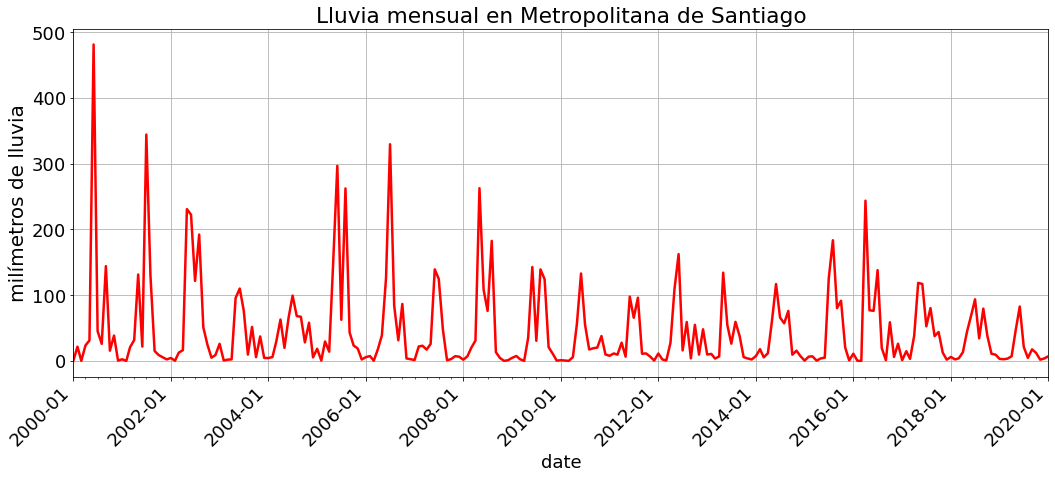

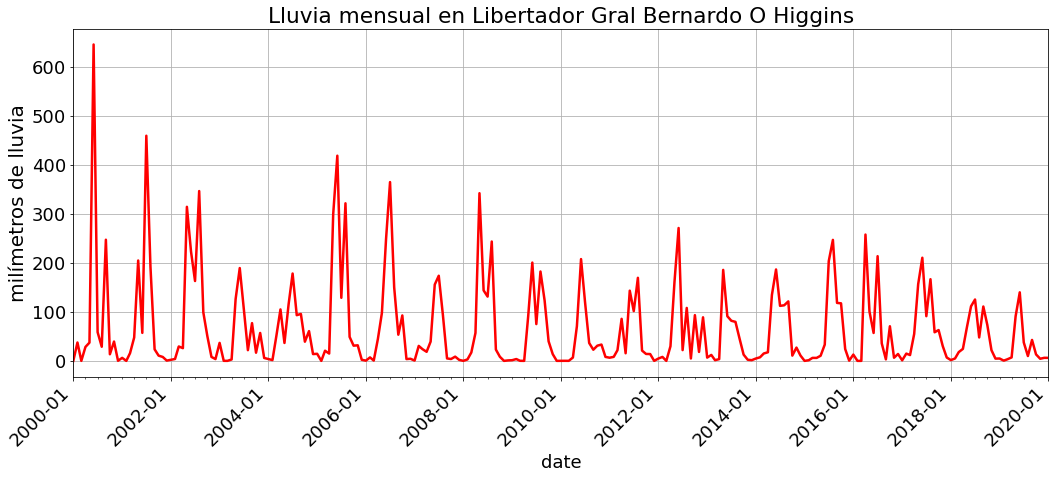

In [32]:
plot_region('Metropolitana de Santiago','2000-01-01','2020-01-01', precipitaciones)
plot_region('Libertador Gral Bernardo O Higgins','2000-01-01','2020-01-01', precipitaciones)

En primera instancia se pueden observar magnitudes similares para los mismos meses. Esto debido a que ambas regiones tienen un clima similar al estar tan cercanas entre sí. Además se puede observar una estacionalidad anual muy marcada, muy partícular del clima chileno, dado que las estaciones del año se marcan debido a las condiciones geográficas del país. Por último, se observa una tendencia a la baja de los datos, muy justificado por las implicancias del cambio climático en nuestro país.

### Usa esta función para graficar las precipitaciones para la Región del Maule durante los años 1982, 1992, 2002, 2012 y 2019.
### - ¿Qué puedes concluir de estos gráficos?

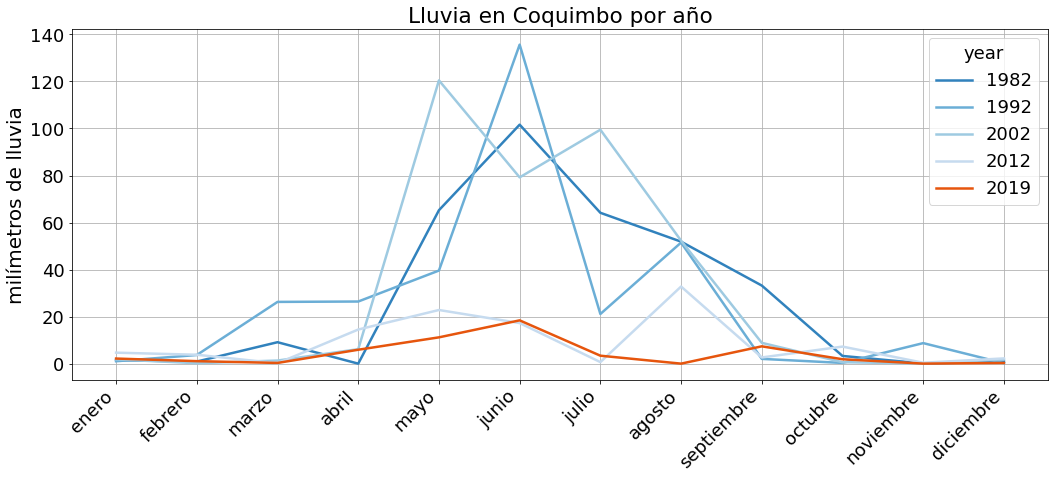

In [33]:
años = [1982, 1992, 2002, 2012, 2019]
plot_multiyears(precipitaciones, años, 'Coquimbo')

Es muy evidente el impacto del cambio climático en nuestro país, provocando la "extensión" de los climas áridos del norte de nuestro país. Antes de los años 2000 existían precipitaciones promedio por sobre los 80 mm en meses de invierno, los cuales se han reducido considerablemente sin alcanzar los 20 mm promedio por mes, en los años analizados posterior al 2000.

Crea una función que permita visualizar dos series históricas de PIB para un rango de fechas determinado. Para esto la función debe recibir como input el nombre de cada serie, fecha de inicio y fecha de término.

Grafica las series de tiempo del PIB agropecuario y silvícola y la del PIB de Servicios financieros desde el 2013-01-01 hasta la fecha más reciente en que haya datos.
- ¿Qué puedes decir de cada serie en particular?
- ¿Hay alguna relación entre estas dos series?

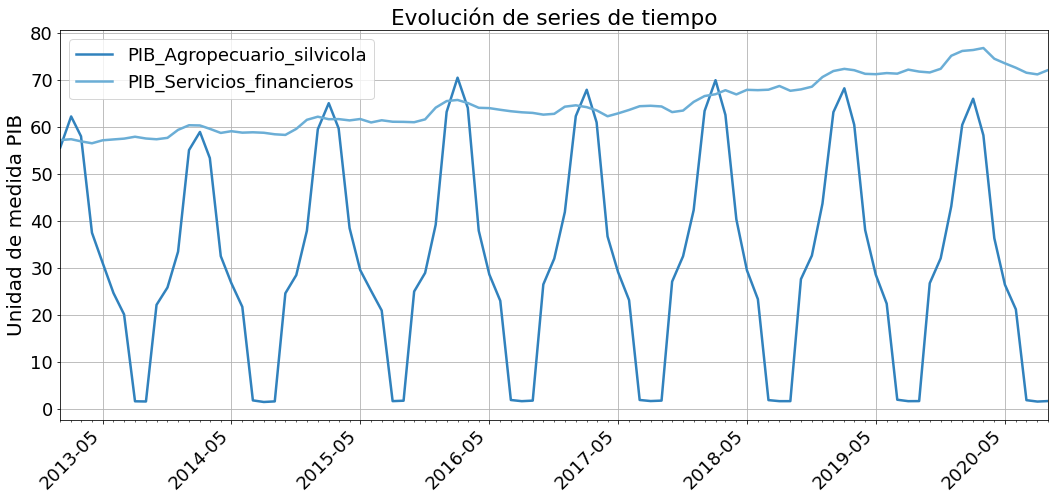

In [34]:
today = date.today().strftime("%Y-%m-%d")
multi_series_daterange(banco_central, ['PIB_Agropecuario_silvicola','PIB_Servicios_financieros'], '2010-01-01', today, 'Unidad de medida PIB')

En la serie PIB Agropecuario silvicola se observa una muy importante estacionalidad. Esta pronunciada variación se alcanza debido a las temporadas de cosecha y plantación, las cuales provocan que la economía tenga una variación más importante en esta categoría. Por otra parte, los servicios financieros son mucho más estables en el tiempo, pero aún así se observa una estacionalidad con _peaks_ que se alcanzan en los mismos meses del alza en el PIB agropecuario. 

Esto hace pensar que el aumento en la economía a partir del sector agropecuario silvicola impulsa el movimiento en los servicios financieros.

Por último el PIB agropecuario se puede observar una tendencia estable en el tiempo, por contrario, los servicios financieros han aumentado en los últimos años, pero queda claro que no ha sido a partir de variaciones en el sector agropecuario silvícola.

## Tratamiento y creación de variables
### ¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? ¿Mucha correlación, no correlacionadas, da igual?

La correlación entre distintas series de tiempo idealmente deben ser muy bajas, esto se alcanza removiendo la estacionalidad de las series de tiempo. Para esto, se aplican _lags_ de las series, alcanzando que las series de tiempo entre sí sean independientes. 

#### Para el entrenamiento del modelo, queremos predecir el precio de la leche para el productor en Chile. Para eso, descarga el archivo precio_leche.csv y haz un merge con las bases de datos de precipitaciones y datos del Banco Central.

In [35]:
def time(x):
    return (pd.Timestamp(x.Anio, x.month, 1, 0, 0))

In [36]:
precio_leche = pd.read_csv('precio_leche.csv')

In [37]:
precio_leche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


Se observa el formato de los meses, y se crea un diccionario para luego poder crear un timestamp, así como existen en las otras tablas analizadas previamente.

In [38]:
mes_esp = [x for x in precio_leche['Mes'].unique()]
mes_eng = [x for x in range(1,13)]
mes_dict = dict(zip(mes_esp,mes_eng))

In [39]:
precio_leche['month'] = precio_leche['Mes'].apply(lambda x : mes_dict[x])

In [40]:
precio_leche['date'] = precio_leche.apply(time, axis = 'columns')
precio_leche = precio_leche[['date','Precio_leche']]

In [41]:
precio_leche.head()

,date,Precio_leche
0,1979-01-01,3.85
1,1979-02-01,4.58
2,1979-03-01,5.18
3,1979-04-01,6.06
4,1979-05-01,7.25


Se realiza un merge entre ambas tablas.

In [42]:
df = precio_leche.merge(precipitaciones, on = 'date', how = 'inner')
df = df.merge(banco_central, on = 'date', how = 'inner')
df.sort_values(['date'], inplace = True)

Se presenta la tabla final a utilizar:

In [43]:
df.head()

,date,Precio_leche,Coquimbo,Valparaiso,Metropolitana de Santiago,Libertador Gral Bernardo O Higgins,Maule,Biobio,La Araucania,Los Rios,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,1996-01-01,90.77,3.816562,2.209708,4.190856,2.927907,8.726955,10.217234,32.170510,53.977597,...,8.696200,NaN,4.888564,NaN,6.691007,NaN,NaN,NaN,NaN,NaN
1,1996-02-01,93.92,0.122523,0.095325,0.112567,0.453225,6.657097,30.756882,74.394494,106.614974,...,8.710216,NaN,5.129593,NaN,6.166317,NaN,NaN,NaN,NaN,NaN
2,1996-03-01,97.31,0.092327,0.112711,0.158557,3.339953,33.786789,70.447227,97.169406,147.990685,...,8.660235,NaN,5.342811,NaN,7.071288,NaN,NaN,NaN,NaN,NaN
3,1996-04-01,99.41,21.909222,26.389757,32.566191,38.467333,46.470466,86.184860,111.626809,152.552636,...,8.490615,NaN,5.342811,NaN,6.830604,NaN,NaN,NaN,NaN,NaN
4,1996-05-01,104.06,0.396065,6.264432,11.668725,31.637612,71.001947,123.433298,166.508560,232.606835,...,8.382394,NaN,5.528218,NaN,6.849859,NaN,NaN,NaN,NaN,NaN


In [44]:
df.shape

(294, 96)

### Crea las variables:
### - A partir de la variable fecha, crea nuevas variables para el año, mes, trimestre.
### - Lags y estadísticas acumuladas (por ejemplo: promedio, varianza) de las variables que consideres relevantes.

In [45]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

Se separan las columnas que se consideran relevantes, y se procede a calcular estadísticas moviles.

In [46]:
columnas_fecha = ['date','year','month']
columnas_relevantes = ['Precio_leche','Coquimbo','Valparaiso','Metropolitana de Santiago',
                      'Libertador Gral Bernardo O Higgins','Maule','Biobio','La Araucania',
                      'Los Rios', 'Imacec_produccion_de_bienes','Imacec_comercio','Imacec_industria',
                      'PIB_Agropecuario_silvicola','PIB_Alimentos',
                      'PIB_Electricidad',
       'Precio_del_petroleo_Brent_dolaresbarril',
                      'Ocupacion_en_Agricultura_INE','Indice_de_produccion_industrial',
                       'Indice_de_produccion_industrial_electricidad__gas_y_agua',
                       'Generacion_de_energia_electrica_CDEC_GWh',
                       'Indice_de_ventas_comercio_real_no_durables_IVCM']

In [47]:
def create_rolling_statistics(serie, serie_name):
    mean_name = serie_name + '_mean'
    std_name = serie_name + '_std'
    mean_rolling = serie.rolling(12).mean()
    std_rolling = serie.rolling(12).std()
    return serie, mean_rolling, std_rolling, mean_name, std_name, serie_name

In [48]:
df3 = df[columnas_fecha]
series_dict = dict()
for col in columnas_relevantes:
    serie, mean_rolling, std_rolling, mean_name, std_name, serie_name = create_rolling_statistics(df[col], col)
    series_dict[serie_name] = (mean_name, std_name)
    df3[serie_name] = serie
    df3[mean_name] = mean_rolling
    df3[std_name] = std_rolling
df3.dropna(inplace=True)

    

Se grafican las series de tiempo con su media movil y desviacion movil. 

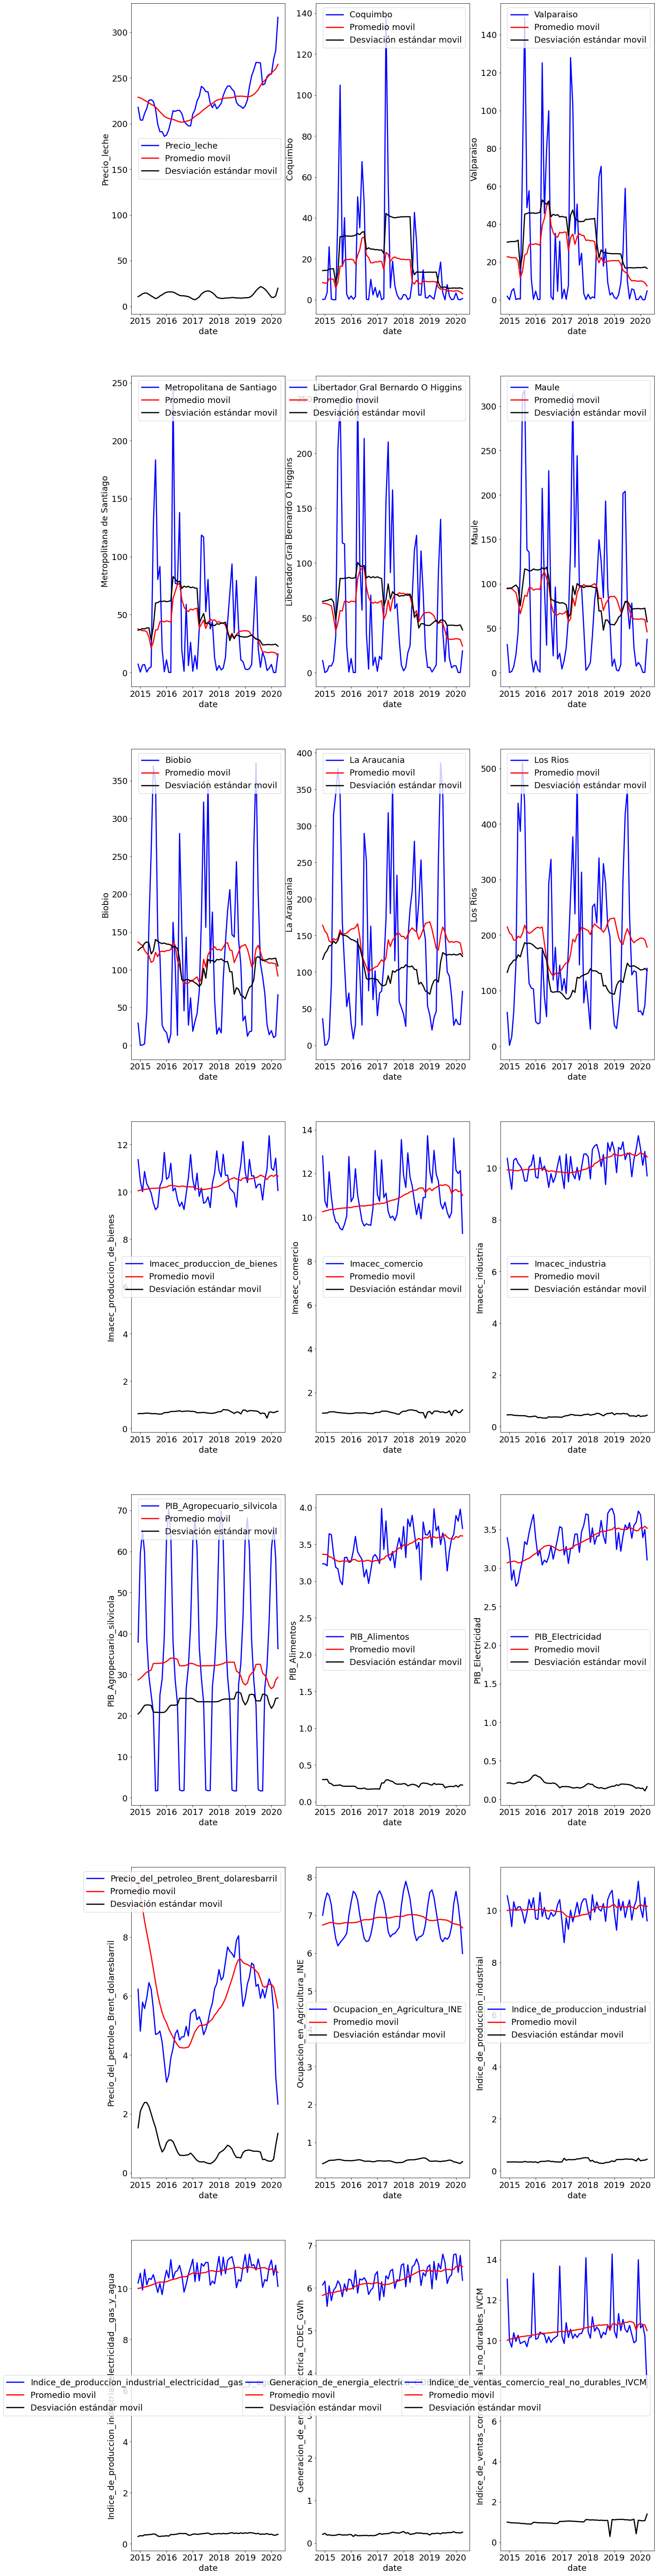

In [49]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(20, 100))
idx_feature = 0

for i in range(ax.shape[0]):
    for j in range(0, ax.shape[1]):
        col_bc = columnas_relevantes[idx_feature]
        promedio, desviacion = series_dict[col_bc]
        sns.lineplot(data = df3,x = 'date', y = col_bc, color='blue',label=col_bc, ax=ax[i][j])
        sns.lineplot(data = df3,x = 'date', y = promedio, color='red', label='Promedio movil', ax=ax[i][j])
        sns.lineplot(data = df3,x = 'date', y = desviacion, color='black', label = 'Desviación estándar movil', ax=ax[i][j])
        plot.set_xlabel(col_bc)
        idx_feature += 1 

Se puede observar claramente que existen medias y desviaciones que aún contienen estacionalidad y tendencia, por lo que se necesitarán más acciones correctivas por sobre estas series para que puedan ser incorporadas al modelo de prediccion. Como mencionaba, en el análisis de series de tiempo es de gran importancia remover la estacionalidad y tendencia de los datos. Esto se alcanza aplicando funciones de estadísticas acumuladas, funciones que penalicen de mayor manera los números más altos (raices y logaritmo) y también diferenciando las series de tiempo. 

## Modelo

### Entrena un modelo que permita predecir el precio de la leche el próximo mes, en función de los datos entregados.

Lamentablemente no pude realizar un modelo que pudiera predecir el precio de la leche en el próximo mes. Esto principalmente por la falta de conocimiento actual y experiencia en la materia. Sin embargo, pude investigar que el mejor enfoque para este tipo de problema _Multivariate Time Series_ es utilizar _Vector Auto Regression_ en vez de utilizar _ARIMA_ y/o sus derivados, dado que este último mejor aplica a _Univariate Time Series_ 

### ¿Qué datos adicionales te gustaría tener?¿Qué datos son necesarios para que este modelo funcione/mejore las métricas?

Otro tipo de variables que hubiera sido ideal contar son los niveles de producción o de venta. Los cuales influyen enormemente en el precio de todo producto. 

### ¿Para qué aplicaciones puede servir un modelo de este tipo? En particular, ¿Cómo podría ayudar a combatir el cambio climático?

Un modelo que permita predecir series de tiempo multivariable son perfectos para ser utilizados en disminuir las emisiones de $CO_2$. Por ejemplo, se podría predecir la demanda de un sistema eléctrico de mejor manera a la cual la realiza la autoridad en la materia. Con esto, se podría manejar de mejor manera los recursos hídricos disponibles y así disminuir el uso innecesario de centrales más contaminantes. 

También sería posible aplicar un modelo de este tipo al sector alimentario, de forma de reducir la producción masiva de alimentos, reduciendo el desperdicio de estos. 

Así como para la producción de alimentos, un modelo de este tipo podría utilizarse en la optimización de tranporte, para poder anticipar de mejor manera los medios de transporte necesarios según la demanda, y por ejemplo, necesitar menos aviones volando.

En fin, los modelos de predicción de series de tiempo son lo suficientemente versátiles para ser aplicados a distintos rubros, para así, poder atacar el cambio climático desde distintas aristas.